<a href="https://colab.research.google.com/github/NavyaSri-2001/Machine_Learning_Models/blob/main/2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
train=pd.read_csv('/content/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

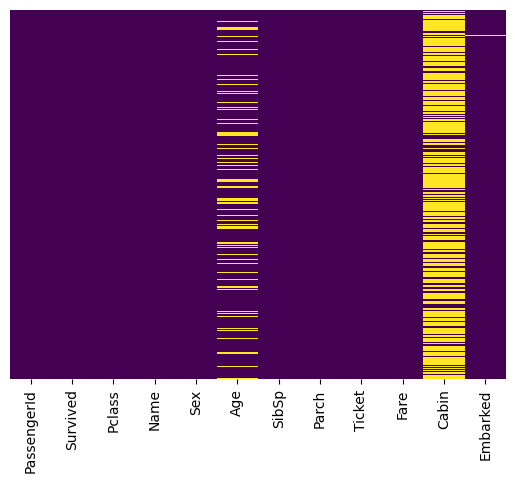

In [7]:
#heatmap to find null values
sns.heatmap(train.isnull(),cmap='viridis', yticklabels=False, cbar=False)
#lets deal with this missing data later

**Exploratory Data Analysis - to understand data even more**

<Axes: xlabel='Survived', ylabel='count'>

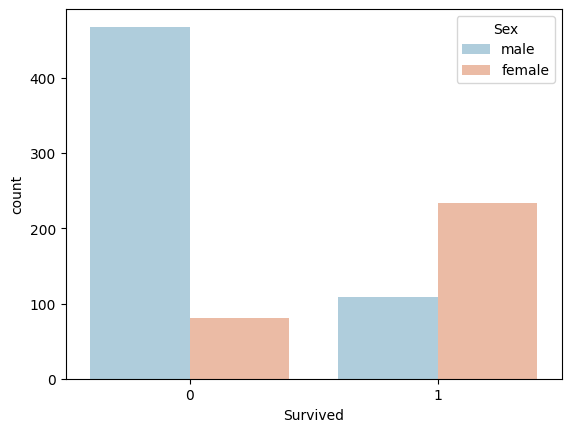

In [9]:
sns.countplot(train, x='Survived', hue='Sex', palette='RdBu_r')
#we can infer that no.of survivors is less compared to people who died
#more males died and more females survived

<Axes: xlabel='Survived', ylabel='count'>

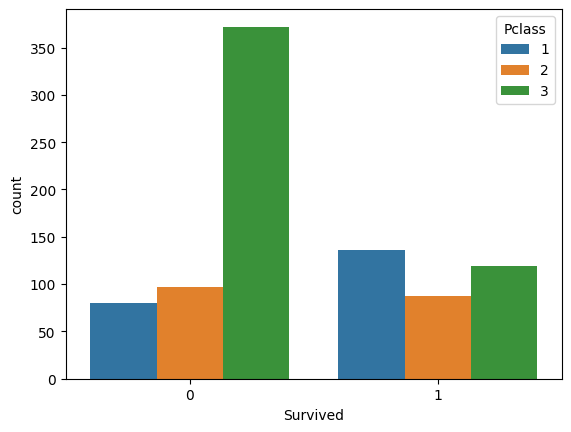

In [11]:
sns.countplot(data=train, x='Survived', hue='Pclass')
#More class 3(low class) people died

29.69911764705882

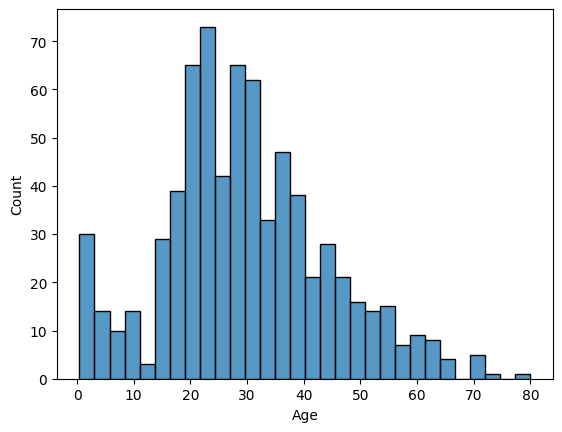

In [17]:
sns.histplot(train['Age'].dropna(),bins=30)
train['Age'].dropna().mean()#more youngsters are there in the ship

<Axes: xlabel='SibSp', ylabel='count'>

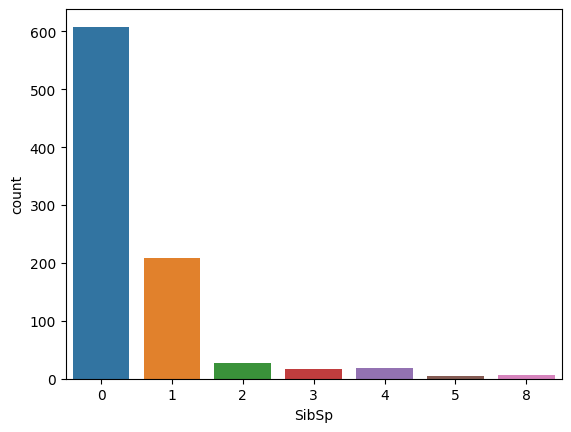

In [18]:
sns.countplot(data=train, x='SibSp')
#most people don't have their sibling or spouse on the ship (since 0 count is more)

<Axes: ylabel='Frequency'>

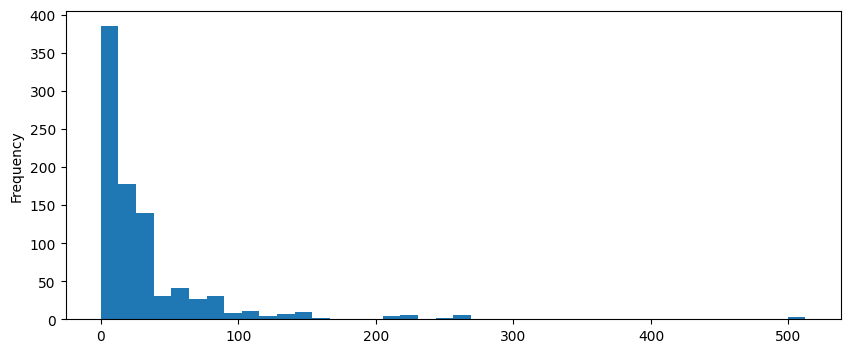

In [19]:
train['Fare'].plot.hist(bins=40, figsize=(10,4))
#most people paid b/w 0-50 which might be 3rd class, since 3rd class people were more

In [20]:
#to view more interactive plots
import cufflinks as cf

In [23]:
cf.go_offline()

In [26]:
train['Fare'].iplot(kind='hist', bins=50)

**Data Cleaning**
1. Removing Null values either by replcing them using imputation or dropping them
2. Creating dummy variables for categorical columns
3. Dropping unused columns

<Axes: xlabel='Pclass', ylabel='Age'>

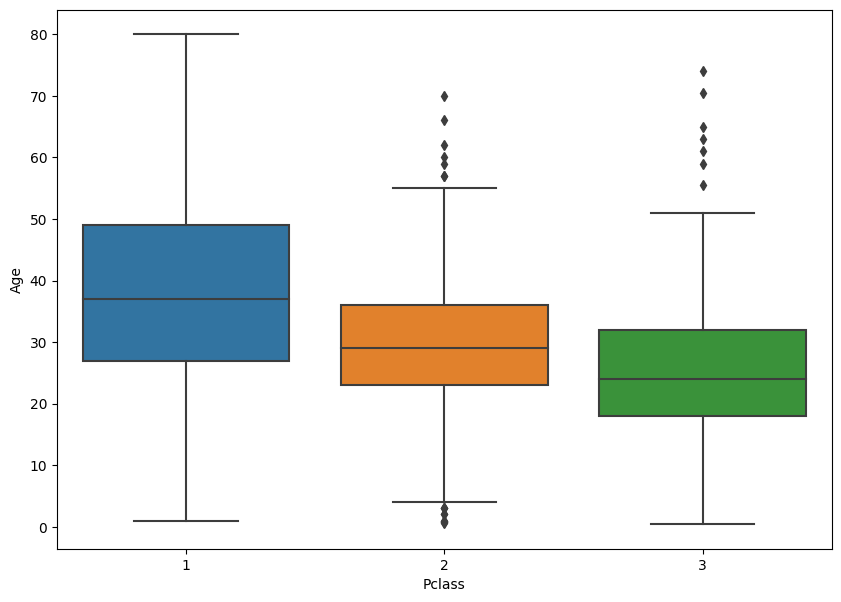

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age', data=train)
#here we have plotted age vs pclass to find avg age of each class
#we can do this across any other column also
#We find the avg by observing the plot for each class and we fill null values of age with avg age based on each class
#this method of filling null values is called imputation

In [30]:
#From above plots we can avg age of class 1 37, class2 is 29, class 3 is 24
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    elif Pclass==3:
      return 24
  else:
    return Age

In [41]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)#axis=1 is imp becoz it should take columns
#pd.set_option('display.max_rows',1000)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: >

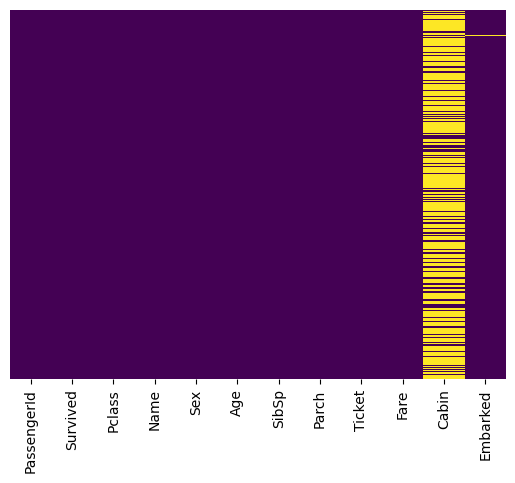

In [42]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')
#we can now see that we dont have any null values in age column

In [43]:
#column Cabin has many null values, so we are droping that column
train.drop('Cabin',axis=1,inplace=True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

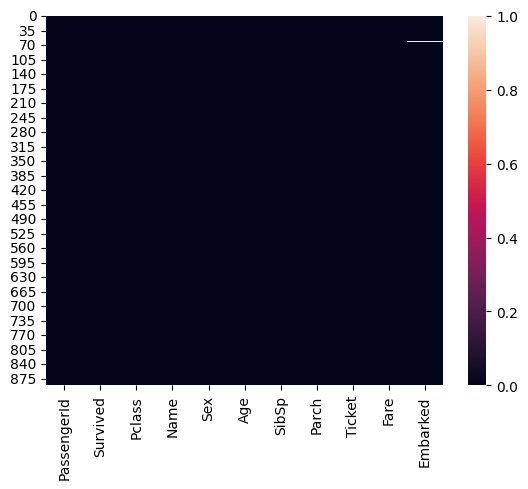

In [45]:
sns.heatmap(train.isnull())

In [46]:
train.dropna(inplace=True)

<Axes: >

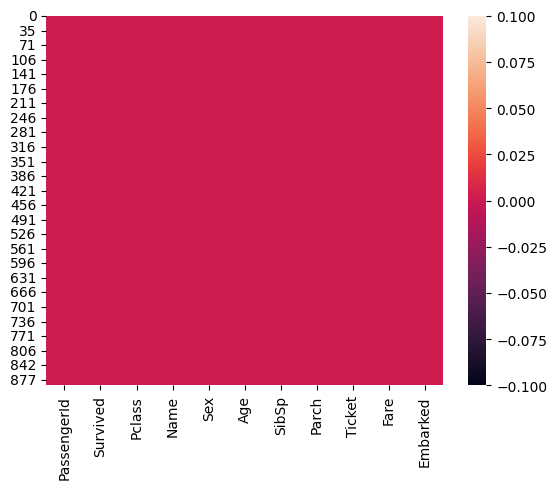

In [47]:
sns.heatmap(train.isnull())

In [52]:
#creating dummy variables for categorical columns
sex=pd.get_dummies(train['Sex'], drop_first=True)#WE set drop_first=True to avoid multi collinearity
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [54]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [55]:
train=pd.concat([train,sex,embark],axis=1)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [56]:
#Dropping unused columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


In [58]:
#PassengerId is just same as row number so we can drop that also
train.drop('PassengerId',axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


**We can see that Pclass is also categorical column. Check what happens if we use get_dummies for that also**

In [59]:
#Logistic regression
#we are using train csv file data as a complete set and splitting it into train and test
X=train.drop('Survived',axis=1)
y=train['Survived']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [62]:
from sklearn.linear_model import LogisticRegression

In [65]:
#Creating instance of LogisticRegression
logmodel=LogisticRegression()

In [66]:
#Training the model
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [67]:
predictions=logmodel.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]])

**Check how to improve precision, recall etc by doing more feature engineering**
ways:
1. take test_csv file, do data cleaning and use it for testing
2. check name, ticket features of data if they have something to do etc
